In [53]:
# IMPORT 

from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier
from sklearn.cluster import AgglomerativeClustering,KMeans
from catboost import CatBoostClassifier
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_curve, roc_auc_score, precision_recall_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats



# Verinin Yüklenmesi


In [54]:
train_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\train.csv")


C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\3526097966.py:1: DtypeWarning: Columns (13,15,19,30,32,37,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\train.csv")


In [55]:
test_df = pd.read_csv(r"C:\Users\bedir\OneDrive\Masaüstü\YMIR\PROJECTS\PYTHON\AI\BTK_DATATHON\DATA\test_x.csv")

# Verinin genel analizi 

In [56]:
# Verinin genel analizi 

class DfAnalyzer:
    
    def __init__(self, data):
        self.data = data
    
    def print_head(self):
        """İlk 5 Satırı yazdırır."""
        print("İlk 5 Satır:\n")
        print(self.data.head())
        print("\n")
    
    def print_columns(self):
        """Sütun adlarını yazdırır."""
        print("Columnlar:\n")
        print(self.data.columns)
        print("\n")
    
    def print_shape(self):
        """Veri çerçevesinin şekil bilgilerini yazdırır."""
        print("Shape:\n")
        print(self.data.shape)
        print("\n")
    
    def print_dtypes(self):
        """Veri türlerini yazdırır."""
        print("Veri Tipleri:\n")
        print(self.data.dtypes)
        print("\n")
    
    def print_nulls(self):
        """Null değerlerin sayısını yazdırır."""
        print("Null Değerler:\n")
        print(self.data.isnull().sum())
        print("\n")

    def print_missing_percentage(self):
        """Eksik verilerin yüzdelerini yazdırır."""
        print("Eksik Verilerin Yüzdeleri:\n")
        
        # Pandas ayarlarını değiştirerek tüm sütunları göstermek için
        pd.set_option('display.max_columns', None)  # Tüm sütunları göster
        pd.set_option('display.max_rows', None)     # Tüm satırları göster

        total_cells = self.data.size
        missing_cells = self.data.isnull().sum().sum()
        missing_percentage = (missing_cells / total_cells) * 100
        print(f"Toplam Eksik Verilerin Yüzdesi: {missing_percentage:.2f}%")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        
        # %50'yi geçen sütunları filtreleyip yazdırma
        high_missing_columns = column_missing_percentage[column_missing_percentage > 50]
        print("\n%50'yi Geçen Sütunlar:\n")
        if not high_missing_columns.empty:
            print(high_missing_columns)
        else:
            print("Hiçbir sütun %50'yi geçmiyor.")
        
        # Pandas ayarlarını varsayılana döndür
        pd.reset_option('display.max_columns')
        pd.reset_option('display.max_rows')
        print("\n")
 
    def plot_missing_percentage_bar(self):
        """Eksik verilerin yüzdelerini çubuk grafik olarak görselleştirir."""
        print("Eksik Verilerin Yüzdeleri - Çubuk Grafik:\n")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        plt.figure(figsize=(12, 8))
        sns.barplot(x=column_missing_percentage.index, y=column_missing_percentage.values, palette="viridis")
        plt.xticks(rotation=90)
        plt.xlabel('Sütunlar')
        plt.ylabel('Eksik Veri Yüzdesi (%)')
        plt.title('Eksik Verilerin Yüzdeleri - Çubuk Grafik')
        plt.tight_layout()
        plt.show()
    
    def print_describe(self):
        """İstatistiksel bilgileri yazdırır."""
        print("İstatistiksel Bilgiler:\n")
        print(self.data.describe())
        print("\n")
    
    def print_info(self):
        """Veri setinin bilgilerini yazdırır."""
        print("Dataset Info:\n")
        print(self.data.info())
        print("\n")
    
    def print_unique(self):
        """Unique değerlerin sayısını yazdırır."""
        print("Unique Değerler:\n")
        print(self.data.nunique())
        print("\n")
    
    def print_nunique(self):
        """Her bir sütunun unique değer sayısını yazdırır."""
        print("N-Unique Değer Sayısı:\n")
        print(self.data.apply(pd.Series.nunique))
        print("\n")
    
    def plot_correlation_matrix(self):
        """Korelasyon matrisini görselleştirir."""
        print("Korelasyon Matrisi :\n")
        numeric_data = self.data.select_dtypes(include=['float64', 'int64'])
        if not numeric_data.empty:
            corr_matrix = numeric_data.corr()
            sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
            plt.show()
        else:
            print("Veri setinde sayısal sütun bulunmamaktadır.")
        print("\n")

    def handle_missing_values(self):
        """Eksik verileri işleyip veri çerçevesini düzenler."""
        print("Eksik Verilerin İşlenmesi:\n")
        
        column_missing_percentage = (self.data.isnull().sum() / len(self.data)) * 100
        
        columns_to_remove = column_missing_percentage[column_missing_percentage > 50].index
        
        self.data = self.data.drop(columns=columns_to_remove)
        
        categorical_columns = self.data.select_dtypes(include=['object', 'category']).columns
        numerical_columns = self.data.select_dtypes(include=['number']).columns
        
        # Kategorik sütunlarda eksik değerleri mod ile doldurma
        print("Kategorik Sütunlar için Eksik Verileri Doldurma:")
        for column in categorical_columns:
            mode_value = self.data[column].mode()[0]
            self.data[column].fillna(mode_value, inplace=True)
            print(f"{column} sütunu mod ile dolduruldu.")
        
        # Sayısal sütunlarda eksik değerleri medyan ile doldurma
        print("Sayısal Sütunlar için Eksik Verileri Doldurma:")
        for column in numerical_columns:
            median_value = self.data[column].median()
            self.data[column].fillna(median_value, inplace=True)
            print(f"{column} sütunu medyan ile dolduruldu.")
        
        print("\nEksik Veri İşleme Tamamlandı.")
        return self.data

In [57]:
df_analyzer = DfAnalyzer(train_df)

In [58]:
df_analyzer.print_head()


İlk 5 Satır:

   Basvuru Yili  Degerlendirme Puani Cinsiyet  Dogum Tarihi        Dogum Yeri  \
0          2014                 52.0    Erkek      4/6/1994  Altindag, Ankara   
1          2014                 30.0    Erkek     6/11/1993           Üsküdar   
2          2014                 18.0    Erkek     1/15/1986            Samsun   
3          2014                 40.0    Erkek      6/4/1991        Diyarbakır   
4          2014                 24.0    Erkek  2 Kasim 1992   Ankara/Altındağ   

  Ikametgah Sehri                    Universite Adi Universite Turu  \
0          Ankara           İHSAN DOĞRAMACI BİLKENT            Özel   
1        İstanbul           İHSAN DOĞRAMACI BİLKENT            Özel   
2        İstanbul  ULUSLARARASI KIBRIS ÜNİVERSİTESİ            Özel   
3        İstanbul       İSTANBUL ŞEHİR ÜNİVERSİTESİ            Özel   
4          Ankara          TURGUT ÖZAL ÜNİVERSİTESİ            Özel   

   Burslu ise Burs Yuzdesi Burs Aliyor mu?  ... Spor Dalindaki Rolunuz N

In [59]:
df_analyzer.print_shape()


Shape:

(65125, 44)




# Veri Önişleme


## Null değerlerin analizi 

Eksik Verilerin Yüzdeleri - Çubuk Grafik:



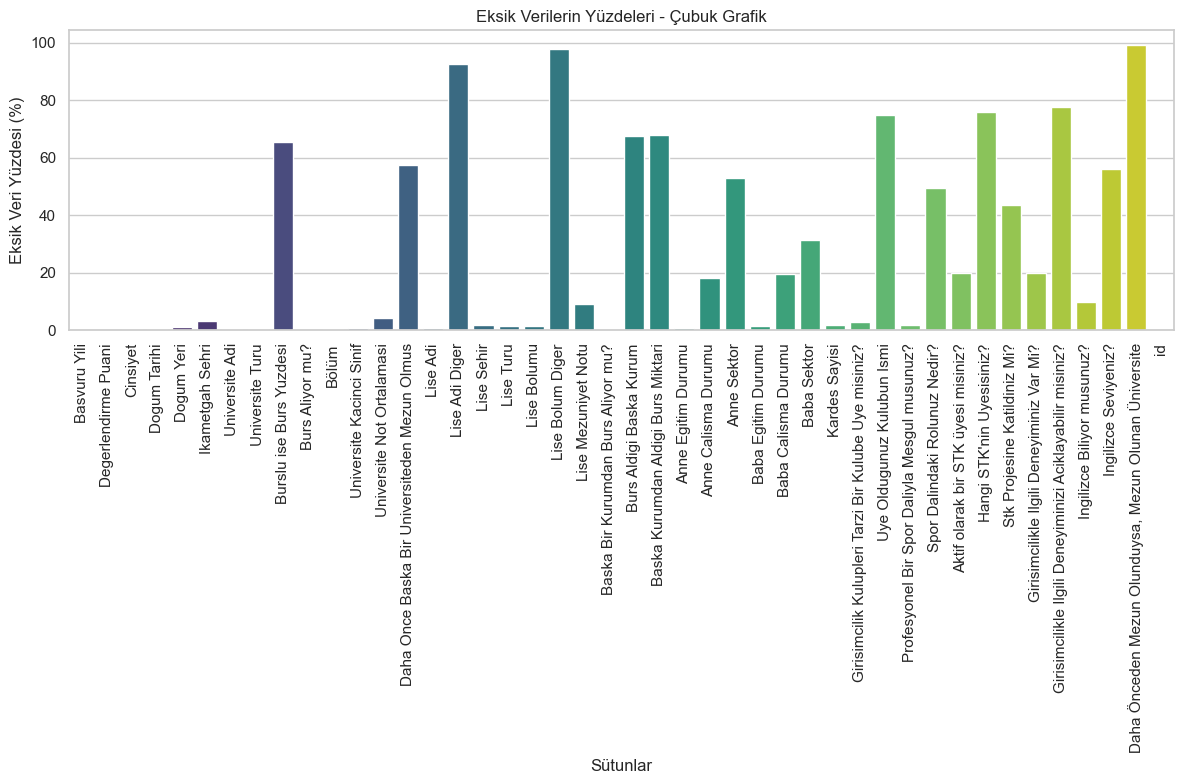

In [60]:
df_analyzer.plot_missing_percentage_bar()

In [61]:
df_analyzer.print_missing_percentage()

Eksik Verilerin Yüzdeleri:

Toplam Eksik Verilerin Yüzdesi: 25.69%

%50'yi Geçen Sütunlar:

Burslu ise Burs Yuzdesi                                      65.543186
Daha Once Baska Bir Universiteden Mezun Olmus                57.343570
Lise Adi Diger                                               92.732438
Lise Bolum Diger                                             97.656814
Burs Aldigi Baska Kurum                                      67.527063
Baska Kurumdan Aldigi Burs Miktari                           67.811132
Anne Sektor                                                  53.031862
Uye Oldugunuz Kulubun Ismi                                   74.765451
Hangi STK'nin Uyesisiniz?                                    76.035317
Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?    77.583109
Ingilizce Seviyeniz?                                         56.096737
Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite        99.356622
dtype: float64




In [62]:
train_df = df_analyzer.handle_missing_values()

Eksik Verilerin İşlenmesi:

Kategorik Sütunlar için Eksik Verileri Doldurma:
Cinsiyet sütunu mod ile dolduruldu.
Dogum Tarihi sütunu mod ile dolduruldu.
Dogum Yeri sütunu mod ile dolduruldu.
Ikametgah Sehri sütunu mod ile dolduruldu.
Universite Adi sütunu mod ile dolduruldu.
Universite Turu sütunu mod ile dolduruldu.
Burs Aliyor mu? sütunu mod ile dolduruldu.
Bölüm sütunu mod ile dolduruldu.
Universite Kacinci Sinif sütunu mod ile dolduruldu.
Universite Not Ortalamasi sütunu mod ile dolduruldu.
Lise Adi sütunu mod ile dolduruldu.
Lise Sehir sütunu mod ile dolduruldu.
Lise Turu sütunu mod ile dolduruldu.
Lise Bolumu sütunu mod ile dolduruldu.
Lise Mezuniyet Notu sütunu mod ile dolduruldu.
Baska Bir Kurumdan Burs Aliyor mu? sütunu mod ile dolduruldu.
Anne Egitim Durumu sütunu mod ile dolduruldu.
Anne Calisma Durumu sütunu mod ile dolduruldu.
Baba Egitim Durumu sütunu mod ile dolduruldu.
Baba Calisma Durumu sütunu mod ile dolduruldu.
Baba Sektor sütunu mod ile dolduruldu.
Kardes Sayisi sü

C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\1125677438.py:133: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[column].fillna(mode_value, inplace=True)


Stk Projesine Katildiniz Mi? sütunu mod ile dolduruldu.
Girisimcilikle Ilgili Deneyiminiz Var Mi? sütunu mod ile dolduruldu.
Ingilizce Biliyor musunuz? sütunu mod ile dolduruldu.
Sayısal Sütunlar için Eksik Verileri Doldurma:
Basvuru Yili sütunu medyan ile dolduruldu.
Degerlendirme Puani sütunu medyan ile dolduruldu.
id sütunu medyan ile dolduruldu.

Eksik Veri İşleme Tamamlandı.


C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\1125677438.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[column].fillna(median_value, inplace=True)
C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\1125677438.py:140: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Eksik Verilerin Yüzdeleri - Çubuk Grafik:



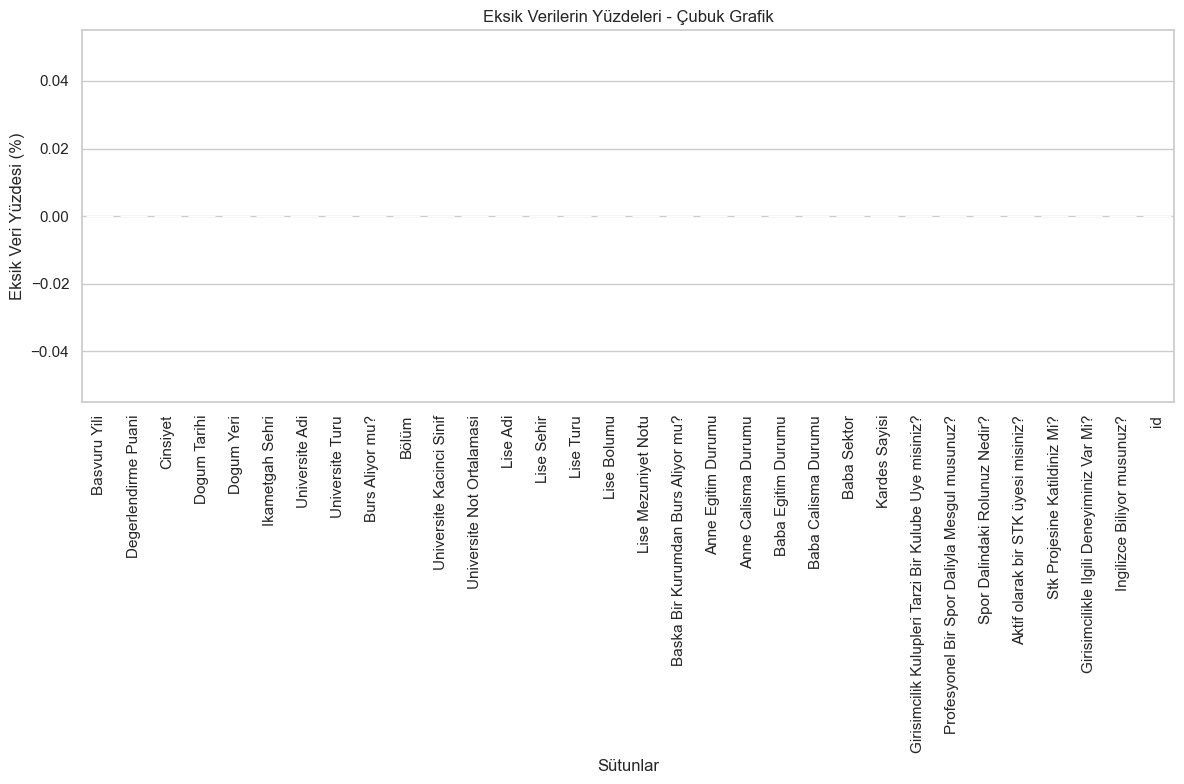

In [63]:
df_analyzer.plot_missing_percentage_bar()

In [64]:
categorical_train_columns = train_df.select_dtypes(include=['object', 'category']).columns
numerical_train_columns = train_df.select_dtypes(include=['number']).columns
categorical_test_columns = test_df.select_dtypes(include=['object', 'category']).columns
numerical_test_columns = test_df.select_dtypes(include=['number']).columns

## Aykırı Değerlerin analizi

In [65]:
class OutlierDetector:
    def __init__(self, data):
        self.df = pd.DataFrame(data)
        self.z_scores = {}
        self.outliers = {}

    def calculate_z_scores(self):
        # Her sütun için Z-Score hesaplama
        for column in self.df.columns:
            self.z_scores[column] = stats.zscore(self.df[column])
            self.outliers[column] = np.abs(self.z_scores[column]) > 3

    def plot_data(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Seaborn stilini ve renk paletini ayarlama
        sns.set(style="whitegrid")
        palette = sns.color_palette("husl", n_colors=len(self.df.columns))

        # Her sütun için Box Plot ve Violin Plot oluşturma
        num_columns = len(self.df.columns)
        fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(15, 5 * num_columns))
        
        for i, column in enumerate(self.df.columns):
            # Box Plot
            sns.boxplot(data=self.df[column], ax=axes[i, 0], palette=[palette[i]])
            axes[i, 0].set_title(f'Box Plot - {column}')
            axes[i, 0].set_xlabel('')
            axes[i, 0].set_ylabel('')

            # Violin Plot
            sns.violinplot(data=self.df[column], ax=axes[i, 1], palette=[palette[i]])
            axes[i, 1].set_title(f'Violin Plot - {column}')
            axes[i, 1].set_xlabel('')
            axes[i, 1].set_ylabel('')

        plt.tight_layout()
        plt.show()

    def remove_outliers(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Aykırı değerleri her sütundan çıkarma
        for column in self.df.columns:
            self.df = self.df[~self.outliers[column]]

    def cap_outliers(self):
        if not self.outliers:
            raise ValueError("Z-Scores hesaplanmadı. Önce `calculate_z_scores` metodunu çağırın.")
        
        # Her sütun için aykırı değerleri üst sınırla değiştirme
        for column in self.df.columns:
            upper_limit = self.df[column].quantile(0.95)
            self.df[column] = np.where(self.df[column] > upper_limit, upper_limit, self.df[column])

    def log_transform(self):
        # Her sütun için log dönüşümü uygulama
        for column in self.df.columns:
            self.df[column] = np.log(self.df[column] + 1)  # +1, log(0) sorununu önler

In [66]:
detector = OutlierDetector(train_df[numerical_train_columns])

In [67]:
detector.calculate_z_scores()


In [68]:
detector.remove_outliers() 

C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\1007566534.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  self.df = self.df[~self.outliers[column]]


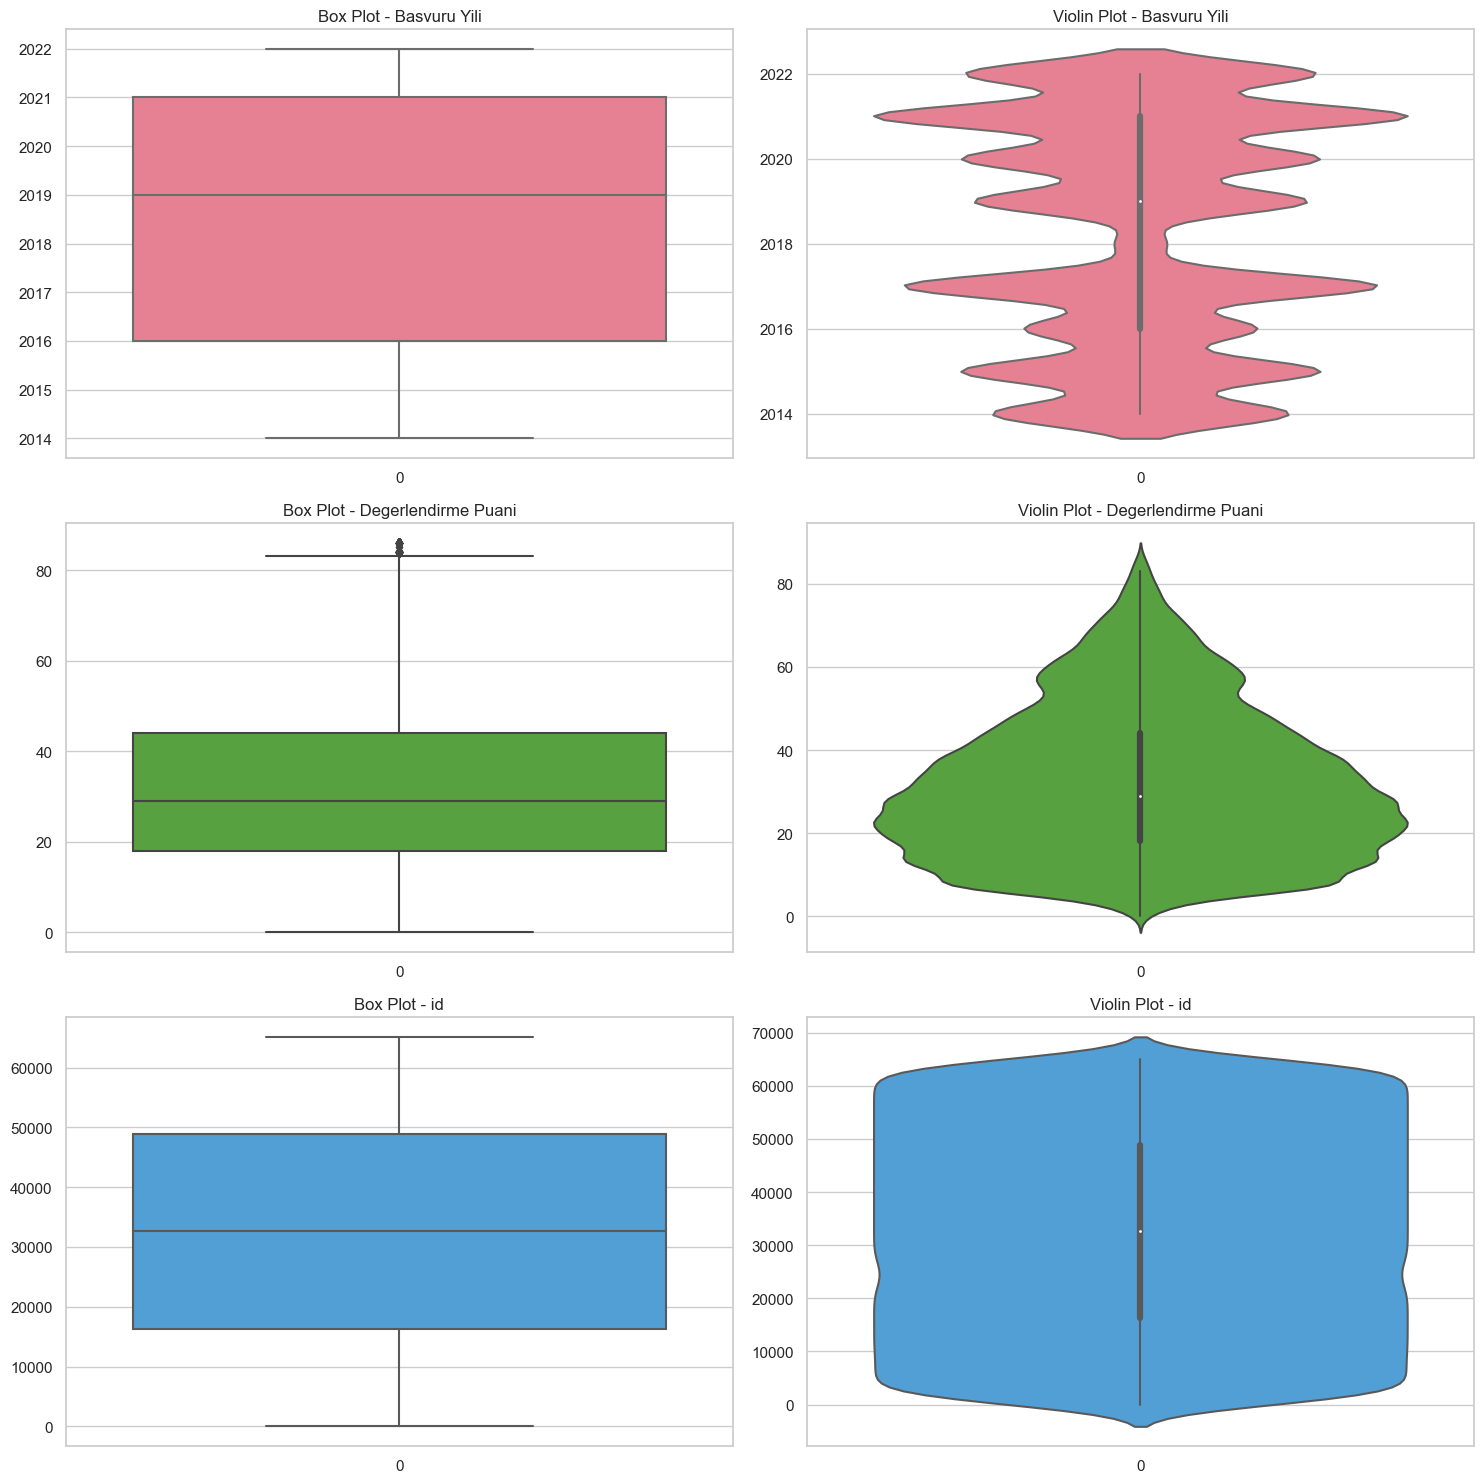

In [69]:
detector.plot_data()


## Feature Engineering

In [70]:
# Label Encoding
le = LabelEncoder()
train_df['Cinsiyet'] = le.fit_transform(train_df['Cinsiyet'])
train_df['Burs Aliyor mu?'] = le.fit_transform(train_df['Burs Aliyor mu?'])
train_df['Universite Turu'] = le.fit_transform(train_df['Universite Turu'])
train_df['Ingilizce Biliyor musunuz?'] = le.fit_transform(train_df['Ingilizce Biliyor musunuz?'])

In [71]:
train_df[categorical_train_columns].columns

Index(['Cinsiyet', 'Dogum Tarihi', 'Dogum Yeri', 'Ikametgah Sehri',
       'Universite Adi', 'Universite Turu', 'Burs Aliyor mu?', 'Bölüm',
       'Universite Kacinci Sinif', 'Universite Not Ortalamasi', 'Lise Adi',
       'Lise Sehir', 'Lise Turu', 'Lise Bolumu', 'Lise Mezuniyet Notu',
       'Baska Bir Kurumdan Burs Aliyor mu?', 'Anne Egitim Durumu',
       'Anne Calisma Durumu', 'Baba Egitim Durumu', 'Baba Calisma Durumu',
       'Baba Sektor', 'Kardes Sayisi',
       'Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?',
       'Profesyonel Bir Spor Daliyla Mesgul musunuz?',
       'Spor Dalindaki Rolunuz Nedir?', 'Aktif olarak bir STK üyesi misiniz?',
       'Stk Projesine Katildiniz Mi?',
       'Girisimcilikle Ilgili Deneyiminiz Var Mi?',
       'Ingilizce Biliyor musunuz?'],
      dtype='object')

In [72]:
# Üniversite Sınıfı Veri Temizleme

train_df['Universite Kacinci Sinif'] = train_df['Universite Kacinci Sinif'].replace({
    'hazırlık': 0,"Hazırlık":0, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, 
    '5': 5, '6': 6, 'Mezun': 7, 'Yüksek Lisans': 8, 'Tez': 9
}).astype(int)


C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\3856396238.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Universite Kacinci Sinif'] = train_df['Universite Kacinci Sinif'].replace({


In [73]:
# Üniversite Notları Veri Temizleme

def convert_not_ortalama(value):
    if value in ['Ortalama bulunmuyor', 'ORTALAMA BULUNMUYOR', 'Not ortalaması yok', 'Hazırlığım']:
        return np.nan  
    elif 've altı' in value:
        return 2.0 
    elif '-' in value:
        numbers = [float(x.strip()) for x in value.replace('ve altı', '').split('-')]
        return np.mean(numbers)
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan 

train_df['Universite Not Ortalamasi'] = train_df['Universite Not Ortalamasi'].apply(convert_not_ortalama)


In [74]:
unique_values_dict = {}

for column in ['Cinsiyet', 'Ingilizce Biliyor musunuz?', 'Universite Turu', 'Burs Aliyor mu?']:
    unique_values_dict[column] = train_df[column].unique()

for column, unique_values in unique_values_dict.items():
    print(f"{column} Benzersiz Değerler: {unique_values}")

Cinsiyet Benzersiz Değerler: [2 3 1 0]
Ingilizce Biliyor musunuz? Benzersiz Değerler: [0 1]
Universite Turu Benzersiz Değerler: [3 1 0 2]
Burs Aliyor mu? Benzersiz Değerler: [1 2 4 3 0]


In [75]:
# Lise Notları Veri Temizleme
def convert_lise_not(value):
    if 'Not ortalaması yok' in value:
        return np.nan  
    elif 've altı' in value:
        return 2.0 
    elif '-' in value:
        try:
            numbers = [float(x.strip()) for x in value.replace('ve altı', '').split('-')]
            return np.mean(numbers)
        except ValueError:
            return np.nan  
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan

train_df['Lise Mezuniyet Notu'] = train_df['Lise Mezuniyet Notu'].apply(convert_lise_not)

In [93]:
# Anne ve Baba Eğitim Durumu Veri Temizleme
def standardize_education_status(df, column_name):
    mapping = {
        'üniversite mezunu': 'Üniversite Mezunu',
        'üniversite': 'Üniversite Mezunu',
        'yüksek lisans / doktora': 'Yüksek Lisans / Doktora',
        'yüksek lisans / doktara': 'Yüksek Lisans / Doktora',
        'yüksek lisans': 'Yüksek Lisans / Doktora',
        'doktora': 'Yüksek Lisans / Doktora',
        'ilkokul mezunu': 'İlkokul Mezunu',
        'ilkokul': 'İlkokul Mezunu',
        'lise mezunu': 'Lise Mezunu',
        'lise': 'Lise Mezunu',
        'ortaokul mezunu': 'Ortaokul Mezunu',
        'ortaokul': 'Ortaokul Mezunu',
        'eğitim yok': 'Eğitim Yok',
        'eğitimi yok': 'Eğitim Yok',
        '0': 'Diğer',
        '-': 'Diğer'
    }

    def map_status(status):
        status_cleaned = str(status).strip().lower()  
        return mapping.get(status_cleaned, 'Diğer') 

    df[column_name] = df[column_name].apply(map_status)
    
    return df
train_df = standardize_education_status(train_df, 'Anne Egitim Durumu')
train_df = standardize_education_status(train_df, 'Baba Egitim Durumu')

print(train_df["Anne Egitim Durumu"].unique())
print(train_df["Baba Egitim Durumu"].unique())


['Üniversite Mezunu' 'Diğer' 'Eğitim Yok' 'Lise Mezunu' 'Ortaokul Mezunu'
 'Yüksek Lisans / Doktora']
['Üniversite Mezunu' 'Yüksek Lisans / Doktora' 'Diğer' 'Lise Mezunu'
 'Ortaokul Mezunu' 'Eğitim Yok']


In [90]:
# Baba Sektör Veri Temizleme
def standardize_sector(df, column_name):
    mapping = {
        'özel sektör': 'Özel Sektör',
        'kamu': 'Kamu',
        'diğer': 'Diğer',
        '': 'Diğer',
        '-': 'Diğer',
        '0': 'Diğer',
        'diger': 'Diğer'  
    }

    def map_sector(sector):
        sector_cleaned = str(sector).strip().lower() 
        return mapping.get(sector_cleaned, 'Diğer') 

    df[column_name] = df[column_name].apply(map_sector)
    
    return df

train_df = standardize_sector(train_df, 'Baba Sektor')
train_df["Baba Sektor"].unique()


array(['Diğer', 'Özel Sektör', 'Kamu'], dtype=object)

In [88]:
# Spor Dalı Rolleri Veri Temizleme
def standardize_role(df, column_name):
    mapping = {
        'kaptan': 'Kaptan',
        'lider/kaptan': 'Kaptan',
        'kaptan / lider': 'Kaptan',
        'bireysel': 'Bireysel',
        'takım oyuncusu': 'Takım Oyuncusu',
        '': 'Diğer',
        '-': 'Diğer',
        'diğer': 'Diğer',
        'diger': 'Diğer',
        '0': 'Diğer'
    }

    def map_role(role):
        role_cleaned = str(role).strip().lower()  
        return mapping.get(role_cleaned, 'Diğer')  

    df[column_name] = df[column_name].apply(map_role)
    
    return df

df = standardize_role(train_df, 'Spor Dalindaki Rolunuz Nedir?')


array(['Diğer', 'Kaptan', 'Bireysel', 'Takım Oyuncusu'], dtype=object)

In [79]:
train_df["Dogum Tarihi"].unique()

array(['4/6/1994', '6/11/1993', '1/15/1986', ..., '10.04.2003 00:00',
       '13.12.1997 00:00', '12.11.2003 00:00'], dtype=object)

In [80]:
# Tarih formatını dönüştürme
from datetime import datetime
def parse_date(date_str):
    formats = [
        '%m/%d/%Y',            # Örneğin: 4/6/1994
        '%d/%m/%Y',            # Örneğin: 06/11/1993
        '%Y-%m-%d',            # Örneğin: 1994-06-15
        '%d.%m.%Y %H:%M',      # Örneğin: 10.04.2003 00:00
        '%d %B %Y',            # Örneğin: 15 Mart 1990
        '%d %B %Y',            # Örneğin: 1 Ocak 2020
        '%Y/%m/%d',            # Örneğin: 1986/01/15
        '%Y-%m-%dT%H:%M:%S',  # Örneğin: 2020-12-31T23:59:59
        '%d-%m-%Y',            # Örneğin: 31-12-2020
        '%d-%m-%Y %H:%M',      # Örneğin: 31-12-2020 23:59
        '%d %B %Y',            # Örneğin: 31 December 2020
        '%B %d, %Y'            # Örneğin: December 31, 2020
    ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, errors='raise')
        except ValueError:
            continue
    
    return pd.NaT
# Tarih sütununu dönüştürme
train_df['Dogum Tarihi'] = train_df['Dogum Tarihi'].apply(parse_date)

# Yaş hesaplama
train_df['Yaş'] = train_df['Dogum Tarihi'].apply(lambda x: datetime.now().year - x.year if pd.notna(x) else None)
print(train_df["Yaş"])


0        30.0
1        31.0
2        38.0
3        33.0
4         NaN
         ... 
65120    21.0
65121    22.0
65122    25.0
65123    24.0
65124    24.0
Name: Yaş, Length: 65125, dtype: float64


In [81]:
train_df["Yaş"].isnull().sum()

28581

# EDA

## Kategorik Verilere İlişkin Grafikler

In [94]:

for col in train_df.columns:
    print(f" {col} :\n   {train_df[col].unique()}\n")

 Basvuru Yili :
   [2014 2015 2016 2017 2018 2019 2020 2021 2022]

 Degerlendirme Puani :
   [ 52.  30.  18.  40.  24.  37.  31.  28.  26.  58.  34.  33.  48.  10.
   8.  54.  14.  44.  60.  42.  22.  16.  29.  46.  41.  50.  53.  36.
  32.  38.  20.  12.  51.  65.  56.  61.  62.  49.  70.  43.  23.  64.
  59.  57.  63.  71.  98.  21.  66.  27.  39.  68.  85.  45.  67.  47.
  78.  19.  13.  90.  72.  77.  55.   6.  79.  76.  75.  74.  73.  17.
  80.  84.  86.  82.  88.  92.  94.  96. 102.   7.   4.  15.  35.  25.
   5.  11.   9.   3.   2.   1.   0.  69.  81.  89.  83. 100.  95.]

 Cinsiyet :
   [2 3 1 0]

 Dogum Tarihi :
   <DatetimeArray>
['1994-04-06 00:00:00', '1993-06-11 00:00:00', '1986-01-15 00:00:00',
 '1991-06-04 00:00:00',                 'NaT', '1992-04-14 00:00:00',
 '1994-10-13 00:00:00', '1993-03-18 00:00:00', '1991-04-25 00:00:00',
 '1995-07-20 00:00:00',
 ...
 '2003-10-25 00:00:00', '2002-09-19 00:00:00', '2003-05-10 00:00:00',
 '2004-05-25 00:00:00', '2003-12-01 00:00:0

C:\Users\bedir\AppData\Local\Temp\ipykernel_25136\3797931436.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Kardes Sayisi'].fillna(median_value, inplace=True)
c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\bedir\AppData\Local\Programs\Python\Python311\Lib\site-pac

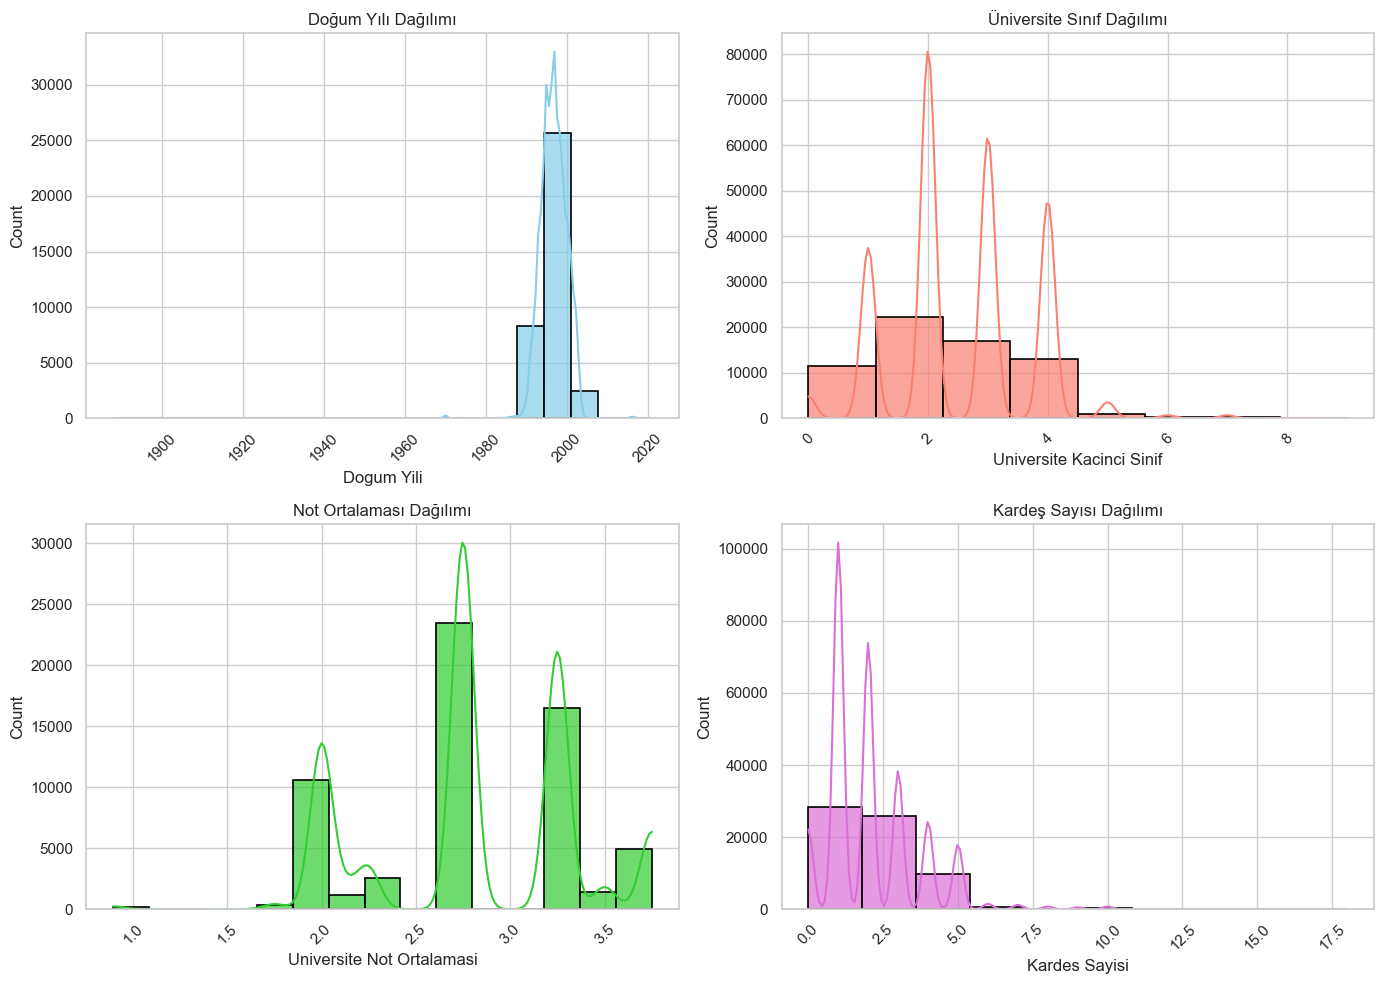

In [83]:
df = train_df

def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return np.nan

df['Kardes Sayisi'] = df['Kardes Sayisi'].apply(convert_to_numeric)

# Medyanı hesapla
median_value = df['Kardes Sayisi'].median()

# NaN değerlerle medyanı doldur
df['Kardes Sayisi'].fillna(median_value, inplace=True)

# Doğum yılını al
df['Dogum Yili'] = pd.to_datetime(df['Dogum Tarihi']).dt.year

# Histogramları daha detaylı ve estetik çizme
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Doğum Yılı Dağılımı
sns.histplot(df['Dogum Yili'], bins=20, ax=axes[0, 0], kde=True, color='skyblue', edgecolor='black', alpha=0.7, linewidth=1.2)
axes[0, 0].set_title('Doğum Yılı Dağılımı')

# Üniversite Sınıf Dağılımı
sns.histplot(df['Universite Kacinci Sinif'], bins=8, ax=axes[0, 1], kde=True, color='salmon', edgecolor='black', alpha=0.7, linewidth=1.2)
axes[0, 1].set_title('Üniversite Sınıf Dağılımı')

# Not Ortalaması Dağılımı
sns.histplot(df['Universite Not Ortalamasi'], bins=15, ax=axes[1, 0], kde=True, color='limegreen', edgecolor='black', alpha=0.7, linewidth=1.2)
axes[1, 0].set_title('Not Ortalaması Dağılımı')

# Kardeş Sayısı Dağılımı
sns.histplot(df['Kardes Sayisi'], bins=10, ax=axes[1, 1], kde=True, color='orchid', edgecolor='black', alpha=0.7, linewidth=1.2)
axes[1, 1].set_title('Kardeş Sayısı Dağılımı')

# X eksenindeki yazıları eğik duruma getirme
for ax in axes.flat:
    plt.sca(ax)
    plt.xticks(rotation=45)

# Aralardaki boşlukları ayarla
plt.tight_layout()

# Grafiği göster
plt.show()
